## Исследование игровых платформ. Описание. План.

_____
***Описание исследования:***

**Цель исследования.**

Выявить определяющие успешность игры закономерности, при учете которых магазин сможет закупить потенциально популярный продукт и спланировать рекламные кампании на 2017-й год.    

    _____
**Задачи исследования.**

Определить жизненный цикл успешных платформ. 

Конкретизировать потенциальных лидеров актуального периода.

Обозначить взаимосвязь между оценками игроков/критиков и продажами.

Составить портрет пользователя каждого региона (NA, EU, JP):
- Выявить самые популярные платформы в каждом регионе.
- Выявить самые популярные и прибыльные жанры в каждом регионе.
- Оценить влияние рейтинга ESRB в каждом регионе.

Проверить гипотезы.

_____
**Исходные данные.**

Перед нами исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы. Данные за 2016 год могут быть неполными.

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
______

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [1. Обзор файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
* [2. Нахождение и ликвидация дубликатов.](#2-bullet)

***Часть 2. Подготовка данных:***
* [1. Обработка пропусков.](#3-bullet)
* [2. Приведение данных к нужным типам.](#4-bullet)
* [3. Нахождение и исправление аномалий и ошибок.](#5-bullet)
* [4. Добавление необходимых столбцов.](#6-bullet)

***Часть 3. Исследовательский анализ данных:***
* [1. Общее состояние рынка](#7-bullet)
* [2. Выявление успешных платформ. Определение жизненного цикла.](#8-bullet)
* [3. Определение актуального для исследования периода.](#9-bullet)
* [4. Выявление потенциальных лидеров актуального периода.](#10-bullet)
* [5. Выяснение взаимосвязи оценок критиков/игроков и продаж.](#11-bullet)
* [6. Поиск прибыльных и популярных жанров.](#12-bullet)
* [7. Самые популярные платформы в каждом регионе.](#13-bullet)
* [8. Самые популярные жанры в каждом регионе.](#14-bullet)
* [9. ESRB рейтинг по каждому региону.](#15-bullet)

[***Часть 4. Проверка гипотез.***](#16-bullet)

[***Часть 5. Общий вывод.***](#17-bullet)


<a id='1-bullet'></a>

In [1]:
# сразу загрузим необходимые библиотеки
import pandas as pd
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats as st


In [2]:
# откроем датасет
data = pd.read_csv('C:\ПРОЕКТЫ/games.csv')

In [3]:
# посмотрим на содержимое
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Сразу отметим, что в данных есть пропуски, их надо обработать. Название колонок таблицы в разном стиле, их необходимо привести к нижнему регистру.

In [4]:
# изучим информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Тоже видим ряд моментов.

Year_of_Release тип float, но содержит особый тип данных - дату.
User_Score тип object, но содержит числа. Необходимо изменить тип данных на вещественный для возможности манипуляций.

In [5]:
# первым делом приведем названия колонок к нижнему регистру
data.columns = data.columns.str.lower()

<a id='2-bullet'></a>

In [6]:
# и проверим на наличие явных дубликатов
data.duplicated().sum()

0

Явных дубликатов нет. Отлично. Проверим неявные.

In [7]:
# проверим по названию игры и платформы
data.duplicated(subset=['name','platform']).sum()

5

In [8]:
# посмотрим на содержимое строк
data[data.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Дубли с названием игры "NaN", т.е. с пропусками, необходимо удалить, т.к. восстановить название не представляется возможным. В принципе в этой строке ценной информации нет, известна только платформа и год выхода безымянной игры.

Остальные дубли требуют дополнительной проверки по году релиза, т.к. в разные годы на одной платформе могут выходить игры с одинаковым названием.

In [9]:
# дополнительная проверка по году
data[data.duplicated(subset=['name', 'platform','year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Действительно, дублей только два. Удалим их. 

In [10]:
# код для проверки имеющегося массива данных перед/после удаления
data.shape

(16715, 11)

In [11]:
# удалим дубликаты, сбросим индексы и проверим результат
data = data.drop_duplicates(subset=['name', 'platform','year_of_release']).reset_index(drop=True)
data.duplicated(subset=['name', 'platform','year_of_release']).sum()
# проверочный код 
# data.shape

0

Неявные дубликаты удалены. Пропусками займемся чуть позже, а сейчас предварительно посмотрим на данные. 

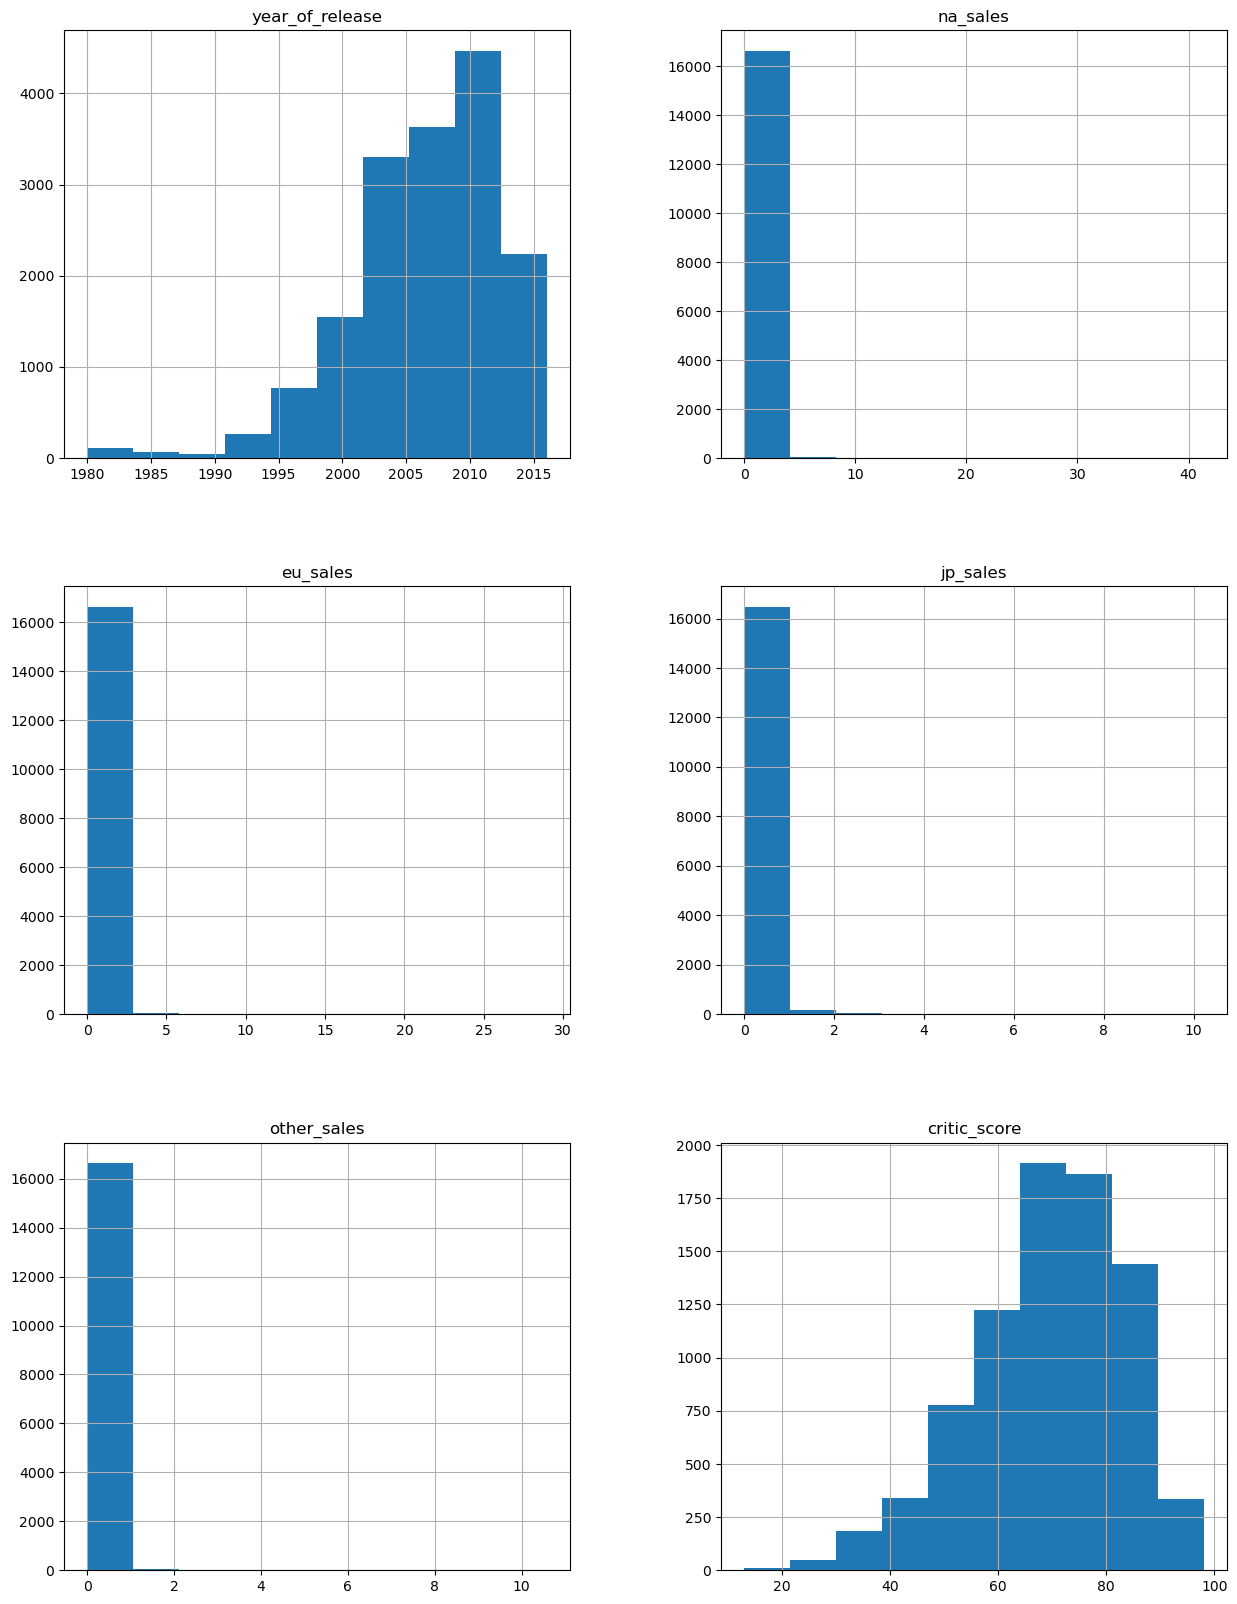

In [12]:
# построим гистрограммы, первоначально изучим данные
data.hist(figsize=(15, 20))
plt.show()

По графику "year_of_release" видим, что в 1990-е годы релизы начали выходить активнее, пик достигнут в районе 2010, а к 2015 резкий спад.

Все графики продаж имеют пик в первой корзине и выбросы, которые надо проработать. Возможно, это некие реальные рекордные продажи.

График "critic_score" показывает, что чаще всего критики дают оценку от 65 до 80.

## Предобработка данных.

Начнем с обработки пропусков. Посмотрим, в каких колонках и в каких количествах они имеются. 

<a id='3-bullet'></a>

In [13]:
# посмотрим, в каких колонках сколько пропусков
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Пропуск в колонке 'name' (уже рассмотрены выше) и 'genre' - это одна и та же строка, практически не содержащая информации. Ее необходимо удалить. 

Пропуски в столбце 'year_of_release' заменить адекватными данными невозможно в силу недостаточности вводных. Установленный год релиза важен для дальнейшего анализа. Строки без года или с заглушками необходимо будет отсеивать. Посмотрим на их содержание и примем решение. 

Пропуски в столбцах 'critic_score' и 'user_score' также нельзя заменить корректными данными. Но пропусков много, при удалении получим существенное искажение исследования. Заглушки будут мешать при манипуляциях. Поэтому оставим как есть. 

В столбце 'user_score' значение 'tbd', означающее "подлежит определению", по сути является пропуском. Заменим его на пропуск настоящий (NaN), чтобы можно было манипулировать данными. Множество пропусков связано с тем, что до определенного момента данные не собирались. Не были так развиты технологии, интернет. Игровая аналитика начала набирать обороты только в 2009 году.

В столбце 'rating' также много пропусков, поэтому данные удалить нельзя и определить нельзя. По сути пропуски в рейтинге означают, что он не установлен, т.е. не известен. Пропуски заменим на "Unknown" ("не известный"). Рейтинг ESRB появился в 1994 году, а в датасете данные с 1980, конечно, в строках до 1994 года будут только пропуски по данному параметру. В Японии собственный рейтинг CERO, поэтому большая доля пропусков в данном регионе. 

Также пропуски могли возникнуть в следствие технических операций с данными (копирование, перезаписывание и тд.).

In [14]:
# удалим строки с пропусками в столбце "name" и "genre"и сразу проверим результат
data = data.dropna(subset=['name'])
data['name'].isna().sum()
# проверочный код
# data.shape

0

Обратимся к столбцу "year_of_release". 269 пропусков, которые тоже нельзя заменить корректными значениями. Посмотрим содержимое строк и каков процент данных имеют эти строки.

In [15]:
data.query('year_of_release.isna()').head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [16]:
# посмотрим долю пропусков
len(data.query('year_of_release.isna()')) / len(data)

0.016096218286261368

1.6% от всех данных, статистически малое количество. Ничего выдающегося в строках с пропусками не обнаружено. Удалим их.

In [17]:
# удалим строки с пропусками и сразу проверим результат
correct_data = data.dropna(subset=['year_of_release']).reset_index()
correct_data['year_of_release'].isna().sum()
# проверочный код 
# correct_data.shape

0

Колонка "year_of_release" хранит особый вид данных - дату. Нас интересует только год. Поэтому переводить в особый формат времени, не станем, но округлим значения до целого числа для удобства восприятия. 

In [18]:
# округлим до целого числа
correct_data['year_of_release'] = correct_data['year_of_release'].astype(int)
correct_data['year_of_release'].sort_values(ascending=False)

16442    2016
12795    2016
14113    2016
14111    2016
14069    2016
         ... 
542      1980
1947     1980
2613     1980
3965     1980
261      1980
Name: year_of_release, Length: 16443, dtype: int32

Так колонка выглядит гораздо лучше. Тип данных изменен на целочисленный. Отметим, что "year_of_release" содержит данные с 1980 по 2016 годы и приступим к колонкам с оценками от критиков и пользователей.

In [19]:
# посмотрим на содержимое колонки
correct_data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Теоретически, критик может поставить любую оценку от 0 до 100, и это будет нормально. Все значения выглядят реальными.
Приходим к тому, что заменить пропуски на адекватное значение не представляется возможным. Оставим их. Проработаем данные в колонке "user_score".

In [20]:
# посмотрим на содержимое колонки
correct_data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Обнаружилось строчное значение "tbd"("to be determined" - англ.), которое мешает совершению математических операций с данной колонкой. По сути, это пропуск. Заменим его на 'nan' и приведем к вещественному типу данных.

<a id='4-bullet'></a>

In [21]:
# заменим строчное значение на 'nan', изменим тип данных и сразу проверим результат
correct_data.loc[(correct_data['user_score'] == 'tbd'),'user_score'] = correct_data.isna()
correct_data['user_score'] = correct_data['user_score'].astype(float)
correct_data['user_score'].sort_values().unique()

# проверочный код
# correct_data['user_score'].dtypes

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

Также как и критик, пользователь может оценить игру от 0 до 10 по своему усмотрению. Все значения находятся в пределах нормальных.

Тип данных в столбце "user_score" изменен на вещественный. Также как в колонке "critic_score" адекватно заменить пропуски не получится, поэтому оставим их и приступим к колонке "rating". 

Заменим пропуски на "Unknown" ("не известный") для дальнейших манипуляций.

In [22]:
# заменим пропуски и сразу проверим результат
correct_data['rating'] = correct_data['rating'].fillna('Unknown')
correct_data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'Unknown'],
      dtype=object)

In [23]:
# проверим данные после всех манипуляций
correct_data.isna().sum()

index                 0
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

<a id='5-bullet'></a>

На этапе составления графиков выявлено странное значение у платформы DS. Игра "Strongest Tokyo University Shogi DS", вышедшая в 1985 году, хотя сама платформа увидела свет в 2004. В датасете это единственная строка с данной игрой. Поиск в открытых источниках не дал корректной информации. Удалим данную строку. 

In [24]:
# посмотрим, что за странное значение "1985" у платформы DS
correct_data.query('year_of_release == 1985 and platform == "DS"')

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15704,15956,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown


In [25]:
# вспомогательный проверочный код
correct_data.shape

(16443, 12)

In [26]:
# удалим его
correct_data.drop(correct_data[(correct_data['platform'] == 'DS')\
                               & (correct_data['year_of_release'] == 1985)].index, inplace = True)
# проверочный код 
#correct_data.shape

<a id='6-bullet'></a>

In [27]:
# добавим столбец "total_sales" с общей суммой продаж для дальнейших расчетов
correct_data['total_sales'] = correct_data[['na_sales','eu_sales','jp_sales','other_sales']]\
.sum(axis='columns') 
# correct_data

Итак, пропуски во всех столбцах обработаны. Тип данных в столбце 'year_of_release' изменен на целочисленный для удобства восприятия, несмотря на то что он хранит дату. В столбце "user_score" изменен на вещественный. 

Для дальнейшего исследования добавлен столбец с общими продажами 'total_sales'.

Данные готовы к исследованию.


## Исследовательский анализ данных

Далее приступим к исследовательскому анализу. Для начала выясним, как менялся рынок игр по годам. Посмотрим количество выпущенных в разные годы релизов - их число говорит об объеме рынка, об интересе к индустрии, о развитии данной сферы.

<a id='7-bullet'></a>

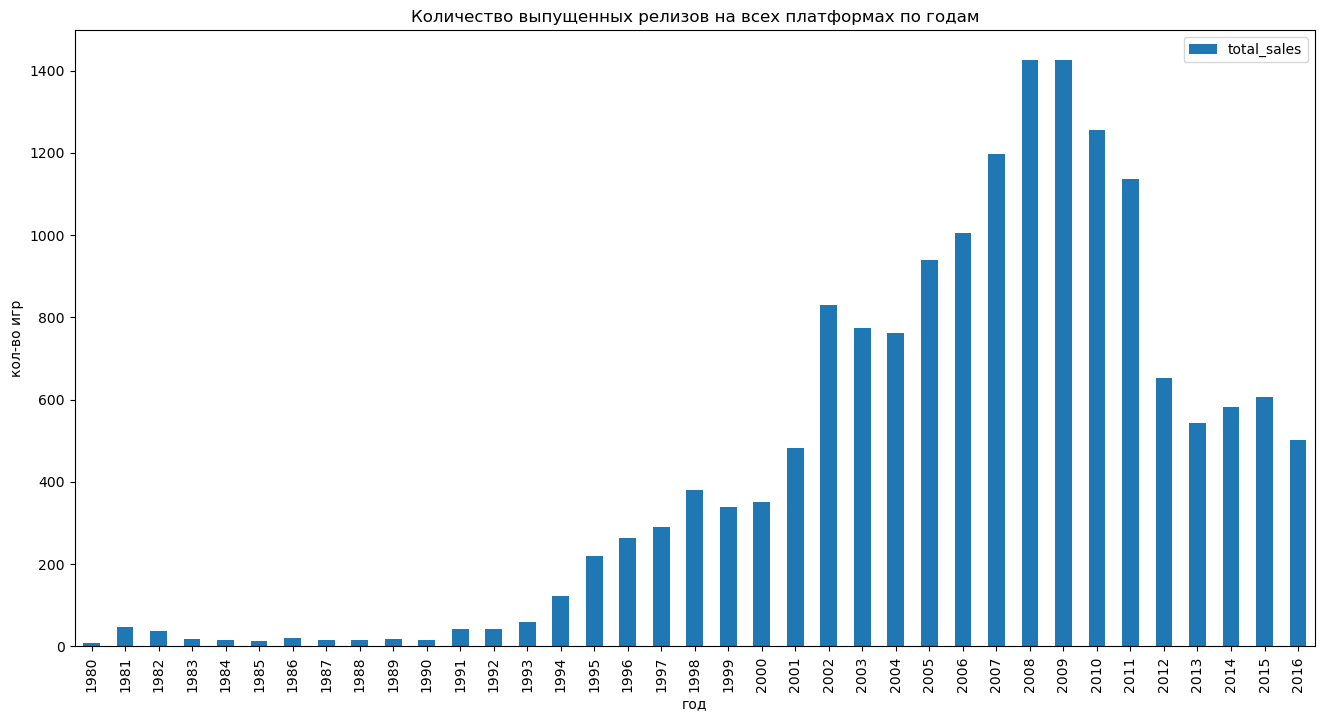

In [28]:
# посмотрим, сколько игр выпускалось в разные годы
correct_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')\
.plot(kind='bar', xlabel='год', ylabel='кол-во игр', \
      title='Количество выпущенных релизов на всех платформах по годам', figsize=(16,8))
plt.show()

Рынок начал активно развиваться в 1995 году до начала 2000-х довольно плавно поднимался, с 2002 несколькими рывками достиг пика в 2008-2009. Такой подъем можно объяснить развитием технологий и доступности интернета, роста интереса игроков. Экономический кризис 2008 года повлиял и на игровую индустрию. В кризис игры оказались самым доступным видом развлечений. Но в тоже время произошли различные поглощения, слияния, а часть компаний-разработчиков оказалась не платежеспособна и закрылась. В 2012 видим резкое снижение количества релизов, в этот же год Nintendo впервые потерпела убытки и стала пересматривать свою политику, до 2016 кол-во релизов держится примерно на одном уровне.

Список платформ довольно велик. Изучим, какие платформы продаются лучше всего и выберем оптимальные варианты для дальнейшего анализа. 

<a id='8-bullet'></a>

In [29]:
# построим сводную таблицу, сгруппируем данные
sales_by_platform = correct_data.pivot_table(index='platform',values='total_sales', aggfunc='sum') 
sales_by_platform.columns = ['sales_amount']
sales_by_platform = sales_by_platform.sort_values(by='sales_amount',ascending=False)
sales_by_platform

,sales_amount
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


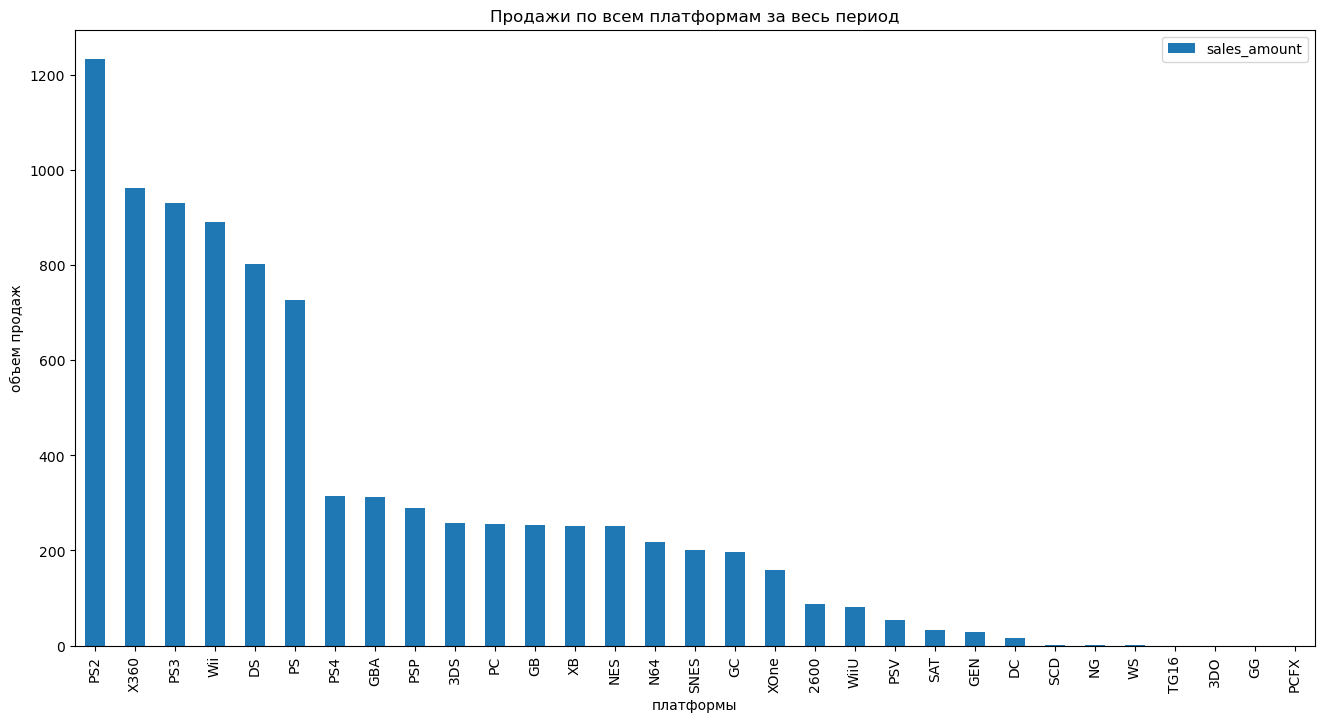

In [30]:
# посмотрим на столбчатой диаграмме
sales_by_platform.pivot_table(index='platform',values='sales_amount')\
.sort_values(by='sales_amount',ascending=False)\
.plot(kind='bar', title='Продажи по всем платформам за весь период', \
      xlabel='платформы', ylabel='объем продаж', figsize=(16,8))
plt.show()

Таблица и график говорят об одном и том же: есть 6 платформ, которые радикально лучше продаются, чем остальные. А именно: PS2, X360, PS3, Wii, DS, PS. Будем опираться на них. Построим графики, изучим, как шли продажи у данных платформ в разные годы.

In [31]:
# сгруппируем выбранные платформы
top_6_data = correct_data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
top_6_data

total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   28.88
         1983                    5.84
         1984                    0.27
...                               ...
XB       2008                    0.18
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

[237 rows x 1 columns]

In [32]:
# преобразуем данные в список
top_6_list = correct_data.pivot_table(index='platform', values='total_sales', aggfunc= 'sum')\
.sort_values('total_sales', ascending=False)
top_6_list = top_6_list.index[:6].tolist()
top_6_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

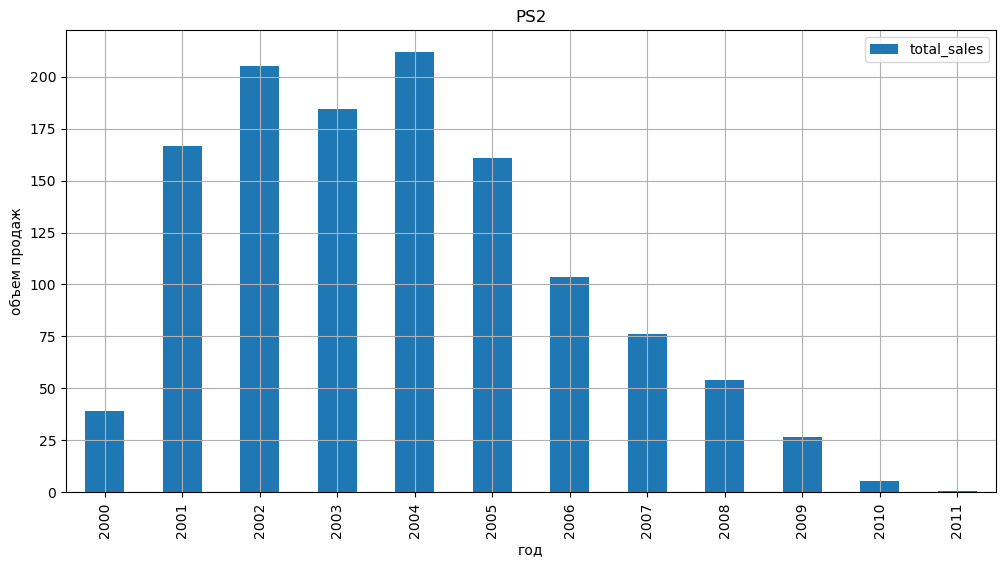

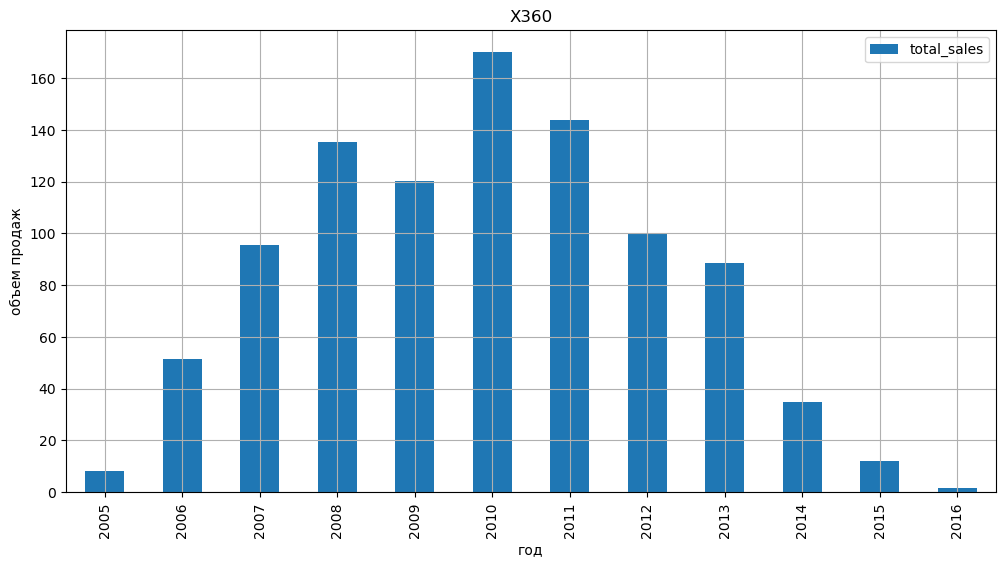

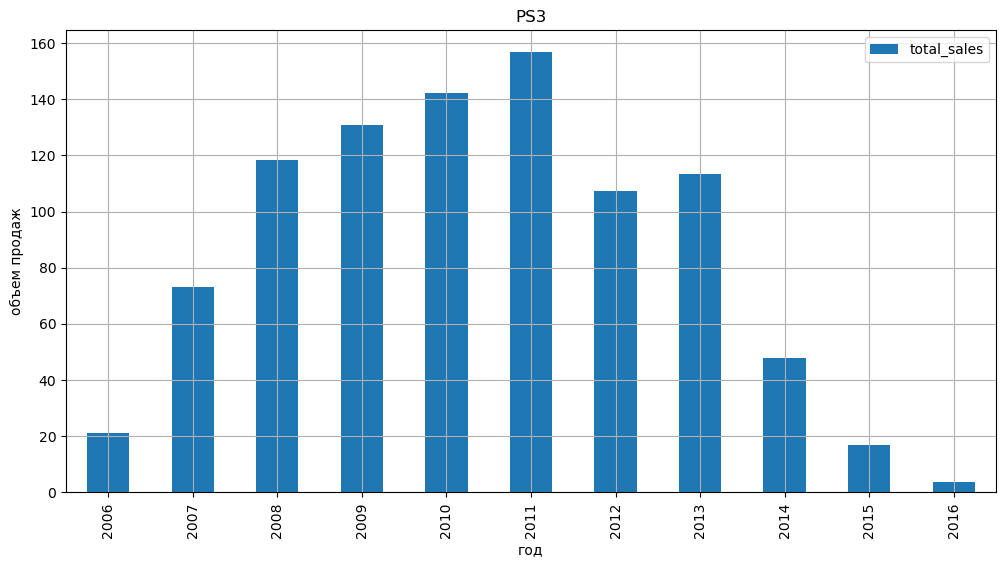

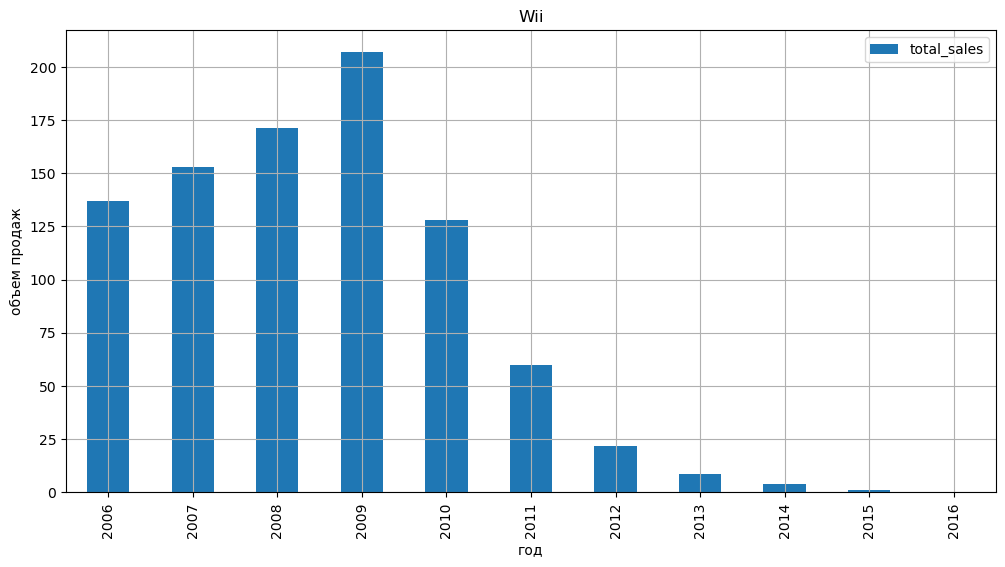

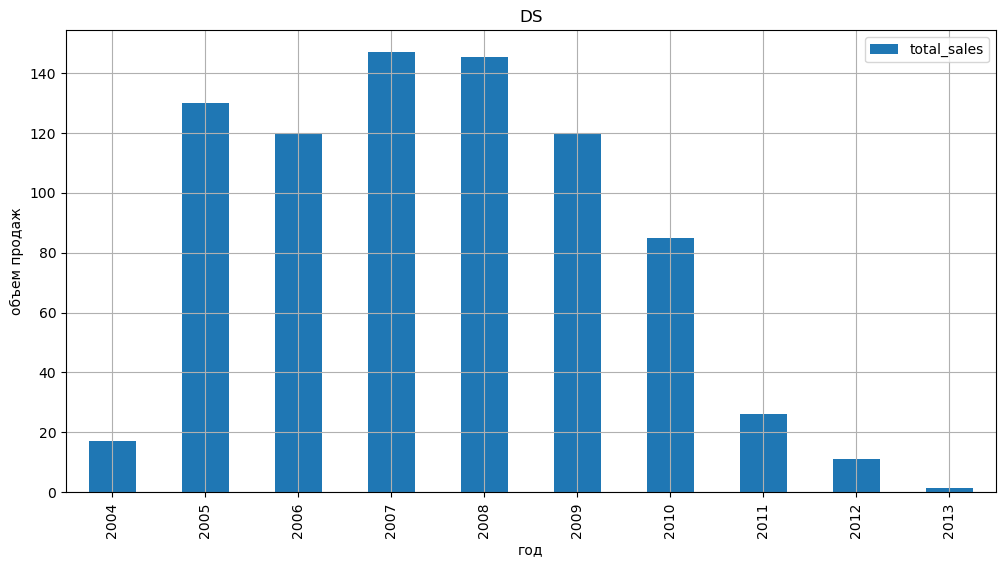

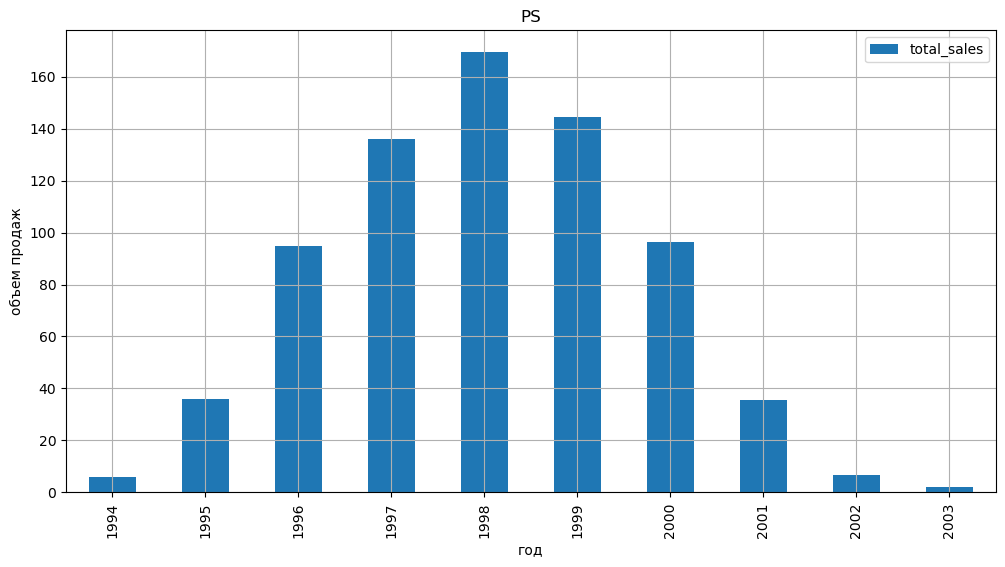

In [33]:
# построим графики продаж по годам для каждой платформы
for x in top_6_list:
    correct_data.query('platform == @x').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', grid=True, xlabel='год', ylabel='объем продаж', figsize=(12,6))
    plt.title(x)

PS2 самая популярная платформа в истории. График подтверждает ее успешность. Вышла в 2000 году (в разных регионах в разные месяцы) и резко набрала популярность. Продажи подскочили в 2001 году и росли до 2004 года (с незначительным снижением в 2003). В 2005 началось постепенное снижение и к 2011 продажи стали минимальными. В 2013 году производство платформы прекратилось по всему миру. 

X360 выпущена в 2005 году и постепенно набирала популярность до 2010 года (с небольшим проседанием в 2009). Спад продаж в 2012 и далее постепенное снижение. С 2014 по 2016 продажи сошли к минимуму.

PS3 вышла в 2006 году и стабильно наращивала популярность до 2011. В 2012-2013 снижение продаж по сравнению с предыдующими годами, но по-прежнему спрос велик. В 2014 резкий спад и к 2016 продажи сводятся к минимальным.

Wii выпущена в 2006 году и сразу "выстрелила" - набрала высокую популярность, которая стабильно росла до 2009. В 2010 резкий спад, но продажи остаются на высоком уровне. В 2011 еще один спад и далее за 2013-2016 годы продажи сходят на нет.

DS выпущена в 2004 году и продавалась в основном на американском и японском рынках. В 2004 появилась обновленная версия и к 2005 резко набрала популярность. Вплоть до 2009 продажи держались на стабильно высоком уровне (с небольшим проседанием в 2006 и пиком в 2007-2008). В 2010 снижение. Далее с 2011 по 2013 продажи максимально снижаются. 

PS вышла в 1994 году, в 1995 году появилась на американском рынке и с 1996 набирала популярность вплоть до 1998 года. До 1999 года продажи держались на высоком уровне. В 2000 спад. В 2001 еще один спад и уже снижение до минимума к 2003.

Проанализировали самые успешные платформы за имеющийся период. Графики показывают, что в среднем платформы находятся на пике спроса от 4 до 6 лет. Подтвердим предположение. Построим общий график.

<a id='9-bullet'></a>

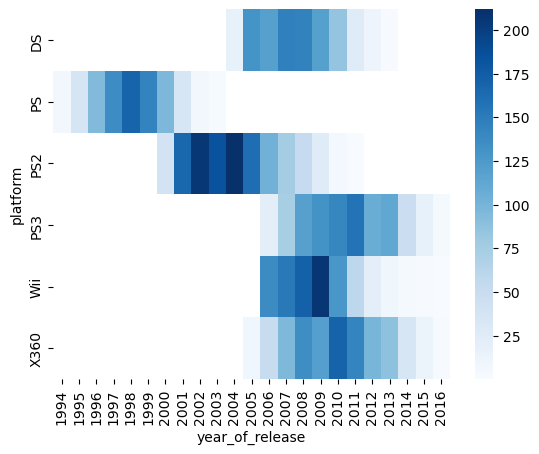

In [38]:
# посмотрим на все лидирующие платформы одновременно
top_6_list_heat = correct_data.query('platform == @top_6_list')\
.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

sns.heatmap(data=top_6_list_heat, cmap="Blues")
plt.show()

На графике хорошо виден путь каждой востребованной платформы от старта до финиша. Весь свой жизненный цикл она проходит в среднем за 9-10 лет. Первые 1-2 года "раскачка" (также важно помнить, что в разных регионах старт продаж может происходить с разницей в несколько месяцев). На подъеме платформа находится в среднем 5 лет, далее за 3-4 года продажи сходят на нет. 

Для дальнейшего анализа возьмем данные за 2013-2016 годы. Это позволит установить, на каком этапе жизни находится та или иная платформа. За 2013-2016 года вышло примерно одинаковое количество релизов. Также учитываем, что данные за более ранние периоды устарели по той причине, что игровой рынок стремительно развивается и меняется.

Изучим, как ведут себя разные платформы в 2013-2016 годах.

In [39]:
# ограничим годы выпуска платформ с 2013
actual_period_data = correct_data.query('year_of_release >= 2013')

<a id='10-bullet'></a>

In [40]:
# взглянем на продажи актуального периода в цифрах
actual_period = actual_period_data.pivot_table(index='platform',values='total_sales', aggfunc='sum') 
actual_period = actual_period.sort_values(by='total_sales',ascending=False)
actual_period

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.79
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


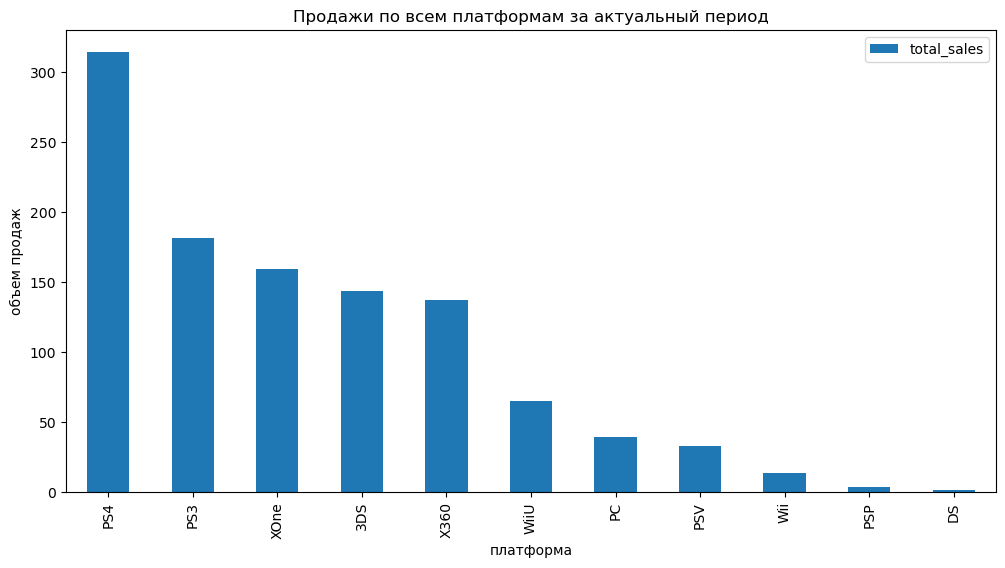

In [41]:
# посмотрим на столбчатой диаграмме
(
actual_period
.pivot_table(index='platform',values='total_sales')\
.sort_values(by='total_sales',ascending=False)\
.plot(kind='bar', title='Продажи по всем платформам за актуальный период', \
      xlabel='платформа', ylabel='объем продаж', figsize=(12,6))
)
plt.show()

Наибольшие продажи у платформ: PS4, PS3, XOne, 3DS, X360. Изучим, на каком этапе в актуальном периоде находятся платформы, у каких имеется потенциал к развитию.

In [42]:
# подготовим данные
actual_platforms = actual_period_data.pivot_table(index='platform', values='total_sales', aggfunc= 'sum').sort_values('total_sales', ascending=False)
actual_platforms = actual_platforms.index[:11].tolist()
actual_platforms

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']

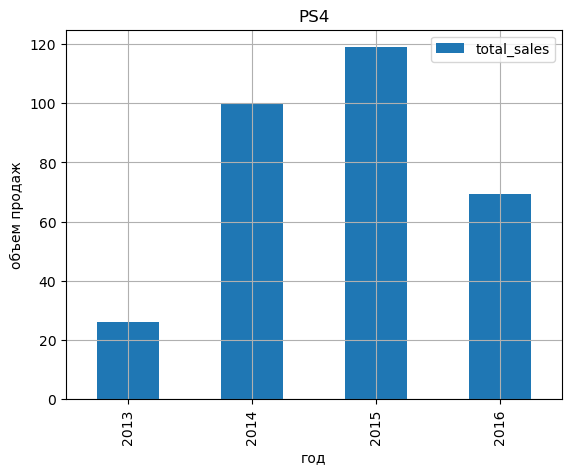

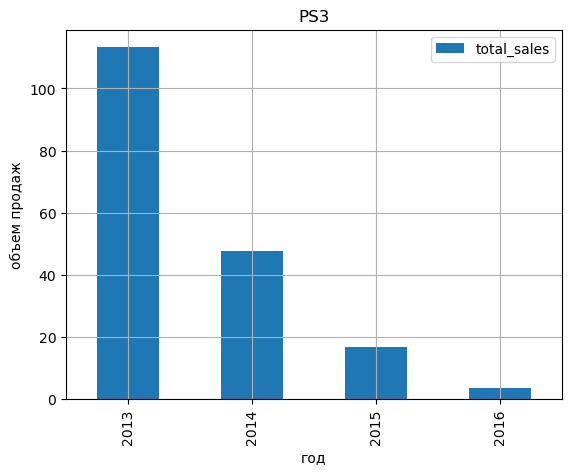

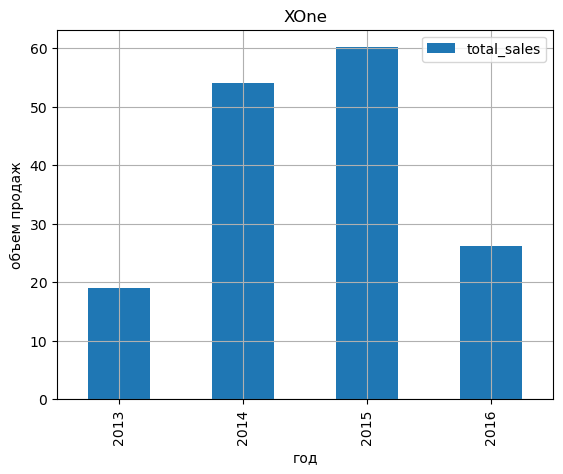

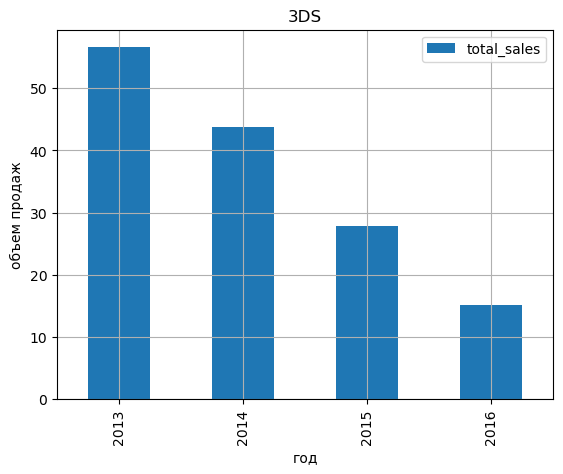

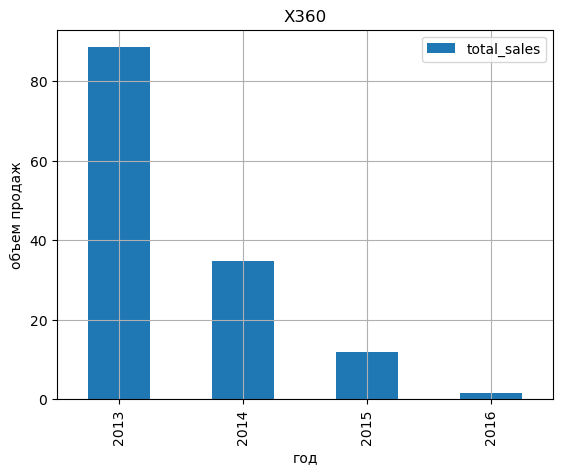

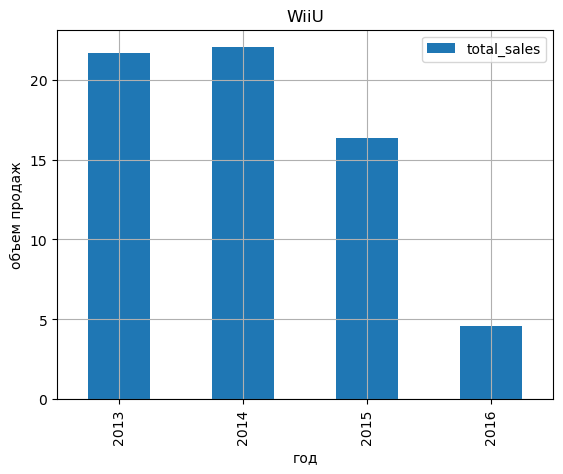

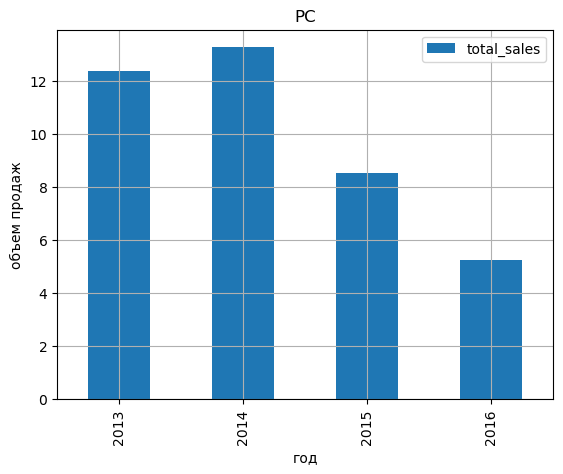

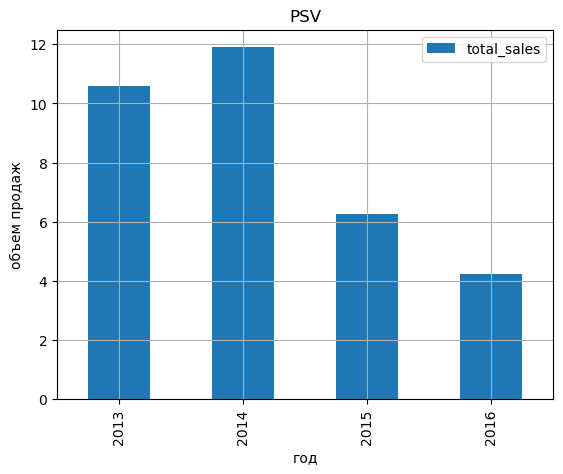

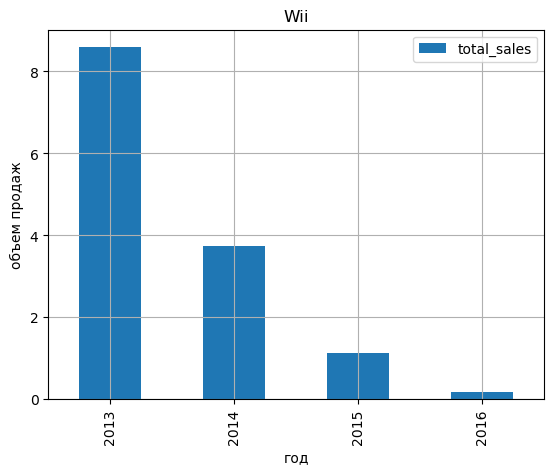

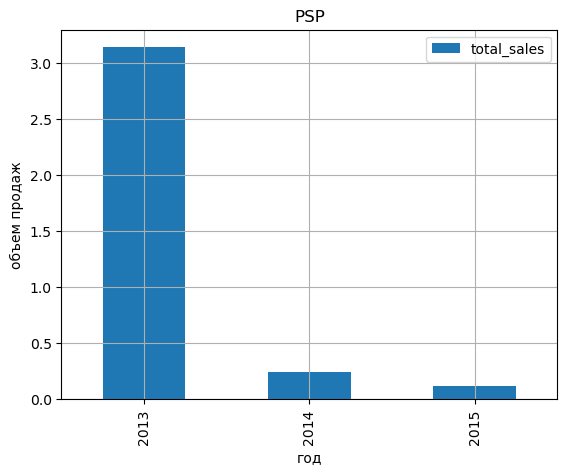

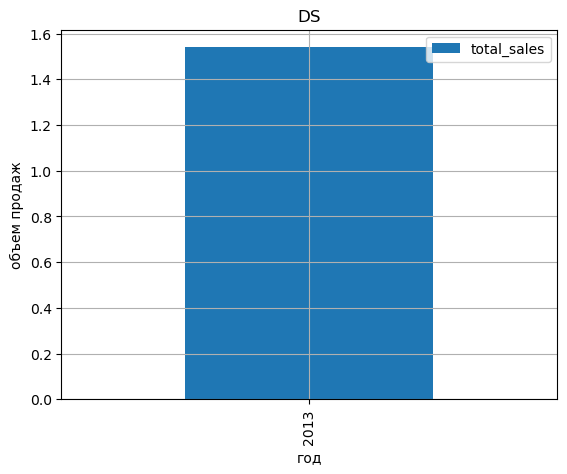

In [43]:
# построим графики для актуальных платформ
for x in actual_platforms:
    actual_period_data.query('platform == @x')\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', grid=True, xlabel='год', ylabel='объем продаж')
    plt.title(x)

PS4 вышла в 2013 году и показала хороший рост в 2014-2015 годах. К 2016 продажи незначительно снизились, но у платформы явно есть потенциал. 

PS3 выпущена в 2006 и в рассматриваемом периоде уже явно сдает позиции в пользу PS4. 

XOne вышла в 2013 году и в актуальном периоде показывает рост, с некоторым снижением в 2016. 

3DS выпущена в 2011 году, в 2013-2016 показывает постепенное снижение.

X360 появилась в 2007 году и в 2013-2016 дает закономерное существенное снижение, тем более на смену уже вышла XOne. 

WiiU стала продаваться в 2012 году, хорошо себя показала в 2013-2014, в 2015 начала падать и к 2016 продажи существенно снижены.

PC существует много лет, в 2013-2014 годах также пользовалась признанием, в 2015-2016 дала снижение.

PSV вышла в 2011, в 2013-2014 держалась на хорошем уровне, в 2015-2016 упала.

Wii показывает поэтапное снижение с 2014 к 2016. 

PSP выпущена в 2004 году, в 2014-2015 году продажи минимальные. За 2016 данных нет. Возможно, продажи сошли на ноль.

DS данные только на 2013 год.

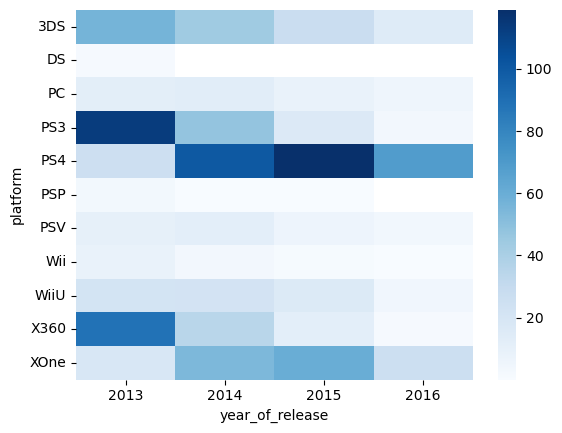

In [44]:
# изучим данные по всем платформам актуального периода на одном хитмэпе
actual_sales_all_platforms = correct_data.query('year_of_release >= 2013')\
.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
sns.heatmap(data=actual_sales_all_platforms, cmap="Blues")
plt.show()

Общая тенденция такова, что с 2014 года все платформы дают ощутимое снижение продаж. Только PS4, пришедшая на смену PS3, и Xone, сменившая X360, дали рост. Их и будем рассматривать как двух потенциально прибыльных лидеров рынка. Однако, не исключено, что при детальном анализе региональных рынков могут "выстрелить" и конкуренты, такие как 3DS и WiiU.

Изучим диаграммы размаха за актуальный период.

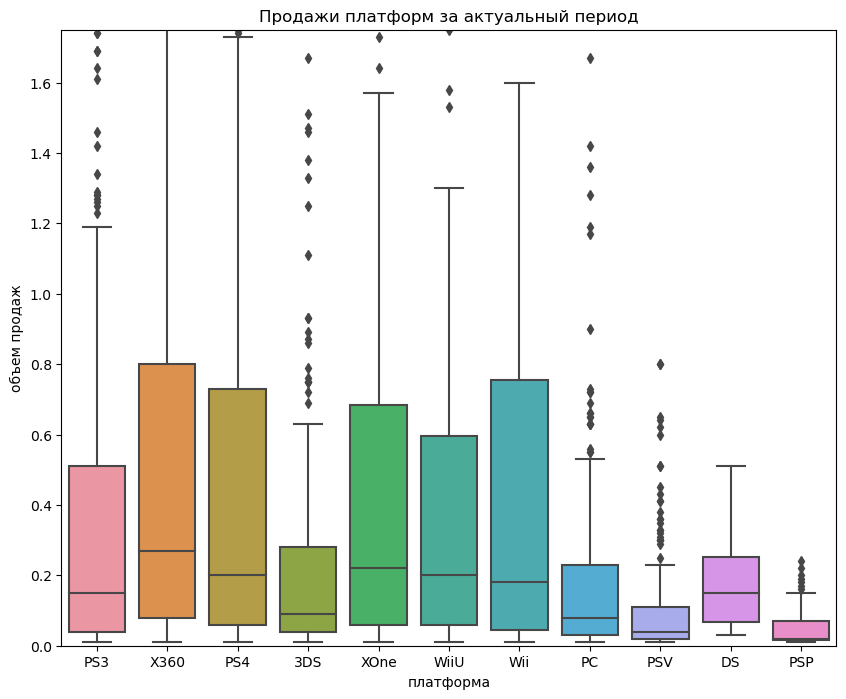

In [45]:
# строим диаграмму
plt.figure(figsize=(10, 8))
sns.boxplot(data=actual_period_data, x='platform', y='total_sales')\
.set(title = 'Продажи платформ за актуальный период', xlabel = 'платформа',\
     ylabel = 'объем продаж', ylim=(0, 1.75))
plt.show()

In [46]:
# сразу используем метод описания
actual_period_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.09,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.15,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.08,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.15,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.02,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.04,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.18,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.20,0.5950,7.09


Самые высокие средние продажи у PS4 и X360. Что логично. PS4(0.8) уже уже практически сменила (и обогнала) свою предшественницу PS3(0.52). А XOne(0.6) не так успешна, как X360(0.73). Nintendo c Wii(0.59) и WiiU(0.56) прочно занимает третье место средних продаж. На пятки им наступает 3DS(0.47).  

Самые низкие средние продажи у PSV(0.09) и PSP(0.05), но отметим, что это портативные устройства, которые скорее всего высоко востребованы в азиатских регионах в силу особенностей потребления. 

Третий квартиль в целом соответствует медиане: X360(0.795) и XOne(0.685), WiiU(0.595) опередила предшественница Wii(0.755), PS4(0.730) и PS3(0.510), 3DS(0.280) и DS(0.252), PC(0.230), PSV(0.110) PSP(0.070).

Объемы продаж у платформ настолько разные, что на одном графике их сложно сравнивать. Построим дополнительные, увеличим картину. Отдельно посмотрим на аномально высокие значения, а также поближе рассмотрим минимальные. 

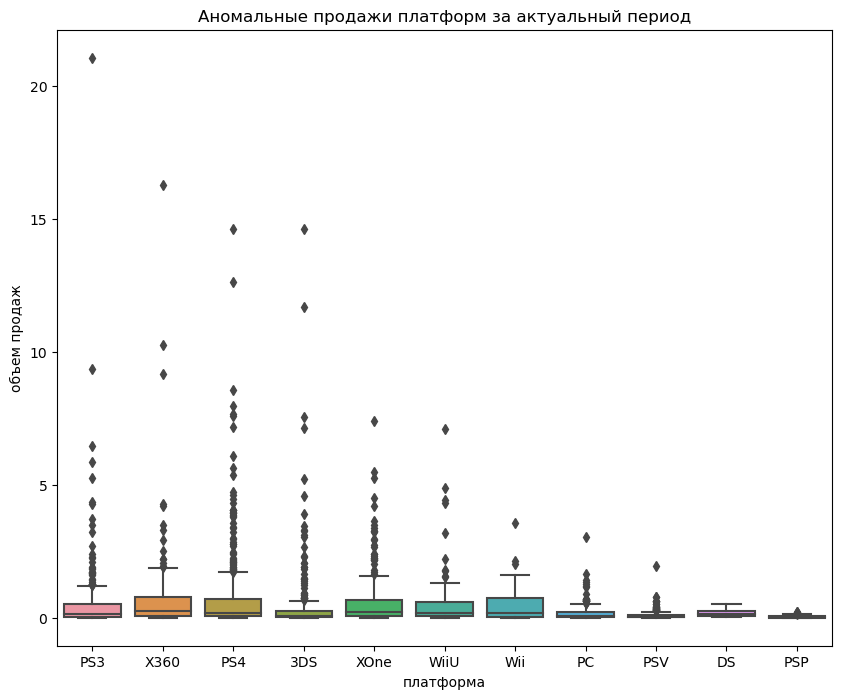

In [47]:
# взглянем на выбросы
plt.figure(figsize=(10, 8))
sns.boxplot(data=actual_period_data, x='platform', y='total_sales')\
.set(title = 'Аномальные продажи платформ за актуальный период', xlabel = 'платформа', ylabel = 'объем продаж')
plt.show()

Хорошо видно, что аномально высокие значения дают всё те же лидеры. Вероятно, это отдельно "выстрелившие" игры. 
Максимальные значения несколько иные, но список лидеров остается таким же. PS3(21.05) и PS4(14.63), X360(16.27) и XOne(7.39), 3DS(14.60), WiiU(7.09) и Wii(3.58).

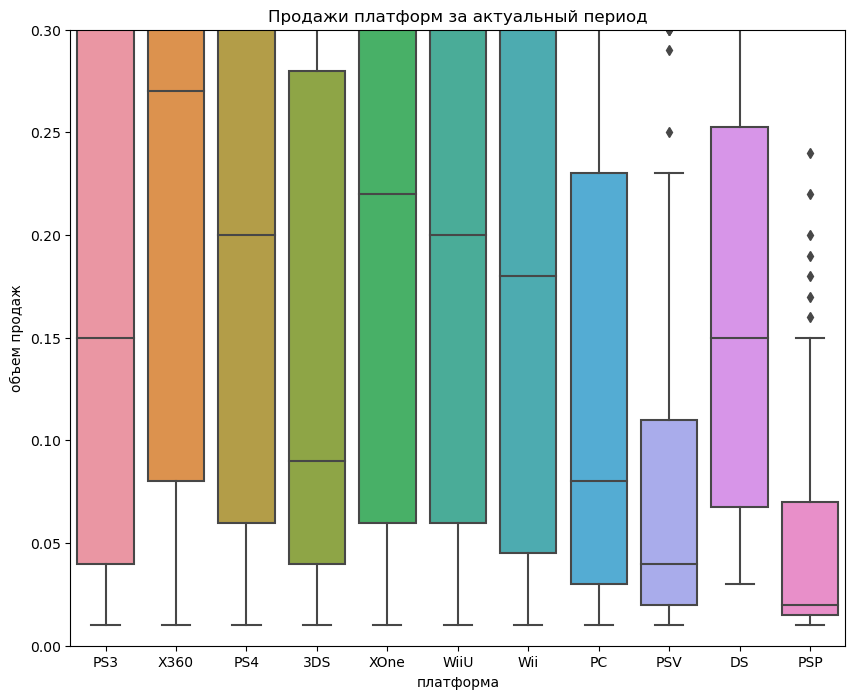

In [48]:
# увеличим нижние значения
plt.figure(figsize=(10, 8))
sns.boxplot(data=actual_period_data, x='platform', y='total_sales')\
.set(title = 'Продажи платформ за актуальный период', xlabel = 'платформа', ylabel = 'объем продаж', ylim=(0, 0.3))
plt.show()

Так гораздо лучше видно медианные значения и 25% квартиль.

По медианным значениям X360(0.265) и XOne(0.220) опередили всех конкурентов, а WiiU(0.200) и Wii(0.180) вышли на второе место, сместив PS4(0.200) и PS3(0.150) на третье. 3DS(0.090) опередела предшественница DS(0.150). PC(0.080), PSV(0.040) PSP(0.020) традиционно в конце списка.

3DS имеет самое большое минимальное значение (0.03). В то время как у остальных платформ одинаковое - 0.1.


Теперь посмотрим, как связаны продажи и оценки пользователей и критиков. Вычислим коэффициент корреляции по лидирующей платформе. Возможно, фанаты/критики разных платформ влияют на мнение друг друга и имеется связь с продажами.

<a id='11-bullet'></a>

In [49]:
# вычисляем коэффициенты
corr_score = actual_period_data.query('platform == "PS4"')
print('Коэффициент корреляции отзывов критиков и продаж PS4', corr_score['critic_score']\
      .corr(corr_score['total_sales']).round(3))
print('Коэффициент корреляции отзывов игроков и продаж PS4', corr_score['user_score']\
      .corr(corr_score['total_sales']).round(3))                            

Коэффициент корреляции отзывов критиков и продаж PS4 0.407
Коэффициент корреляции отзывов игроков и продаж PS4 0.023


In [50]:
# вычисляем коэффициенты для XOne
corr_score = actual_period_data.query('platform == "XOne"')
print('Коэффициент корреляции отзывов критиков и продаж XOne', corr_score['critic_score']\
      .corr(corr_score['total_sales']).round(3))
print('Коэффициент корреляции отзывов игроков и продаж XOne', corr_score['user_score']
      .corr(corr_score['total_sales']).round(3))                            

Коэффициент корреляции отзывов критиков и продаж XOne 0.417
Коэффициент корреляции отзывов игроков и продаж XOne 0.074


In [51]:
# вычисляем коэффициенты для 3DS
corr_score = actual_period_data.query('platform == "3DS"')
print('Коэффициент корреляции отзывов критиков и продаж 3DS', corr_score['critic_score']\
      .corr(corr_score['total_sales']).round(3))
print('Коэффициент корреляции отзывов игроков и продаж 3DS', corr_score['user_score']
      .corr(corr_score['total_sales']).round(3))     

Коэффициент корреляции отзывов критиков и продаж 3DS 0.357
Коэффициент корреляции отзывов игроков и продаж 3DS 0.337


In [52]:
# вычисляем коэффициенты для WiiU
corr_score = actual_period_data.query('platform == "WiiU"')
print('Коэффициент корреляции отзывов критиков и продаж WiiU', corr_score['critic_score']\
      .corr(corr_score['total_sales']).round(3))
print('Коэффициент корреляции отзывов игроков и продаж WiiU', corr_score['user_score']
      .corr(corr_score['total_sales']).round(3))    

Коэффициент корреляции отзывов критиков и продаж WiiU 0.376
Коэффициент корреляции отзывов игроков и продаж WiiU 0.362


Сопоставим данные со всем рынком.

Корреляция между оценками пользователей и продажами по всему рынку: 0.093


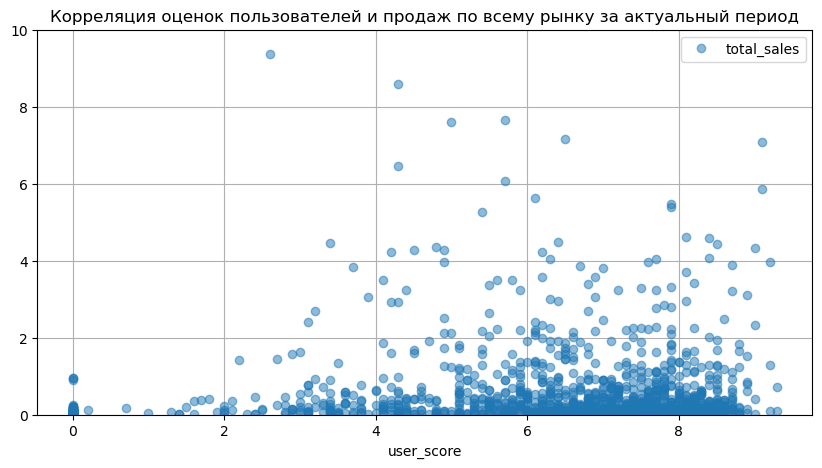

In [53]:
# построим график по оценкам пользователей и измерим коэффициент
print('Корреляция между оценками пользователей и продажами по всему рынку:', \
      actual_period_data['user_score'].corr(actual_period_data['total_sales']).round(3))
(actual_period_data
    .query('year_of_release >= 2013')
    .plot(x='user_score', y='total_sales', 
          ylim=(0, 10), style='o', grid=True, figsize=(10, 5), alpha=0.5)
 .set(title = 'Корреляция оценок пользователей и продаж по всему рынку за актуальный период')
)
plt.show()

Корреляция между оценками критиков и продажами по всему рынку: 0.314


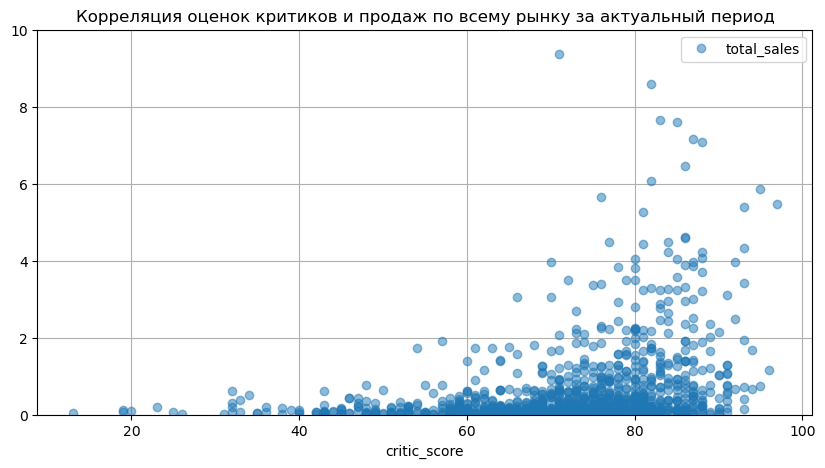

In [54]:
# построим график по оценкам критиков и измерим коэффициент
print('Корреляция между оценками критиков и продажами по всему рынку:', \
      actual_period_data['critic_score'].corr(actual_period_data['total_sales']).round(3))
(actual_period_data
    .query('year_of_release >= 2013')
    .plot(x='critic_score', y='total_sales', 
          ylim=(0, 10), style='o', grid=True, figsize=(10, 5), alpha=0.5)
 .set(title = 'Корреляция оценок критиков и продаж по всему рынку за актуальный период')
)
plt.show()

В целом по рынку оценки критиков демонстрируют слабую корреляцию с продажами. Между оценками пользователей и продажами корреляции нет. 
По PS4 и XOne картина приближена к общей ситуации на рынке. 
Любопытно, что у японских платформ Nintendo (WiiU и 3DS) имеется слабая взаимосвязь как оценок пользователей и продаж, так и оценок критиков и продаж примерно на одном уровне. Оба показателя в районе 0.3. Возможно, влияют региональные факторы. 
Далее изучим, как распределены игры по жанрам.

<a id='12-bullet'></a>

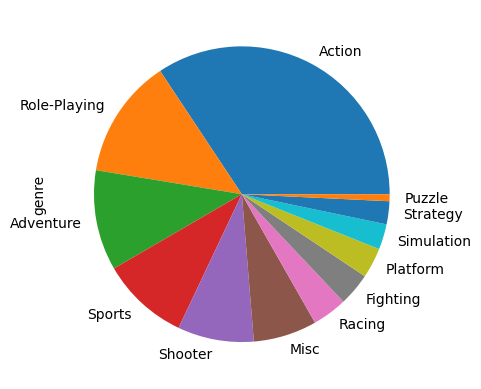

In [55]:
# общее распределение игр по жанрам наиболее наглядно показывает "пирог"
actual_period_data['genre'].value_counts().plot(kind='pie')
plt.show()

Жанр "Action" лидирует с большим преимуществом. "Role-Playing", "Adventure","Sports", "Shooter", "Misc" тоже довольно популярны. Но значит ли это, что популярные жанры приносят больше прибыли, чем менее популярные? Проверим.

Для этого возьмем медианное значение продаж, ведь некоторые игры особенно сильно "выстреливают" и продаются огромными тиражами. Такие "выбросы" могут исказить объективную оценку прибыльности жанра.

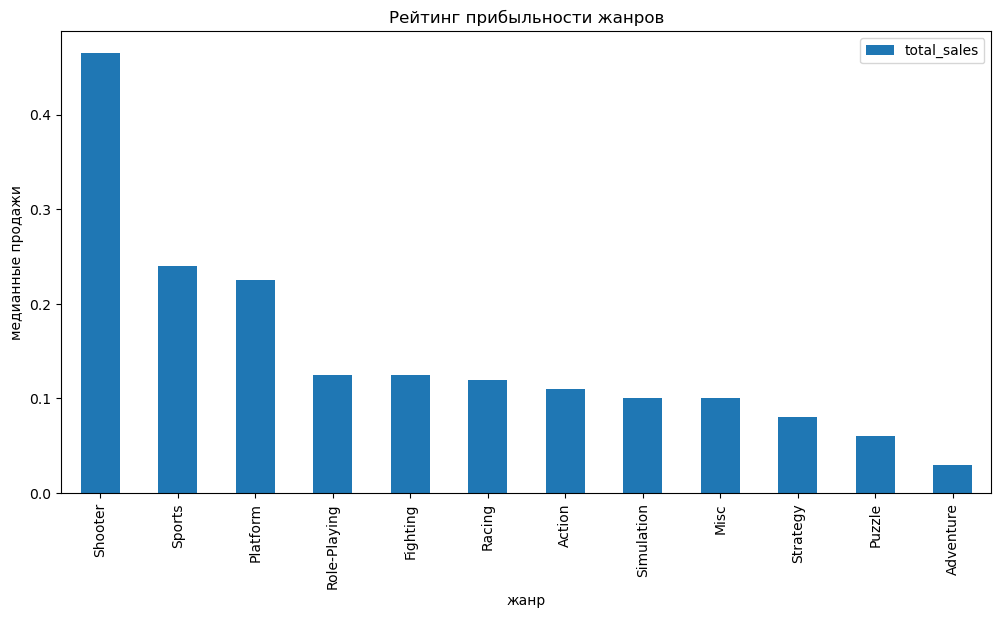

In [56]:
# построим столбчатую диаграмму по медиане
(actual_period_data
.pivot_table(index='genre', values='total_sales', aggfunc='median')
.sort_values(by='total_sales',ascending=False)
.plot(kind='bar', title='Рейтинг прибыльности жанров', \
      xlabel='жанр', ylabel='медианные продажи', figsize=(12,6))
)
plt.show()

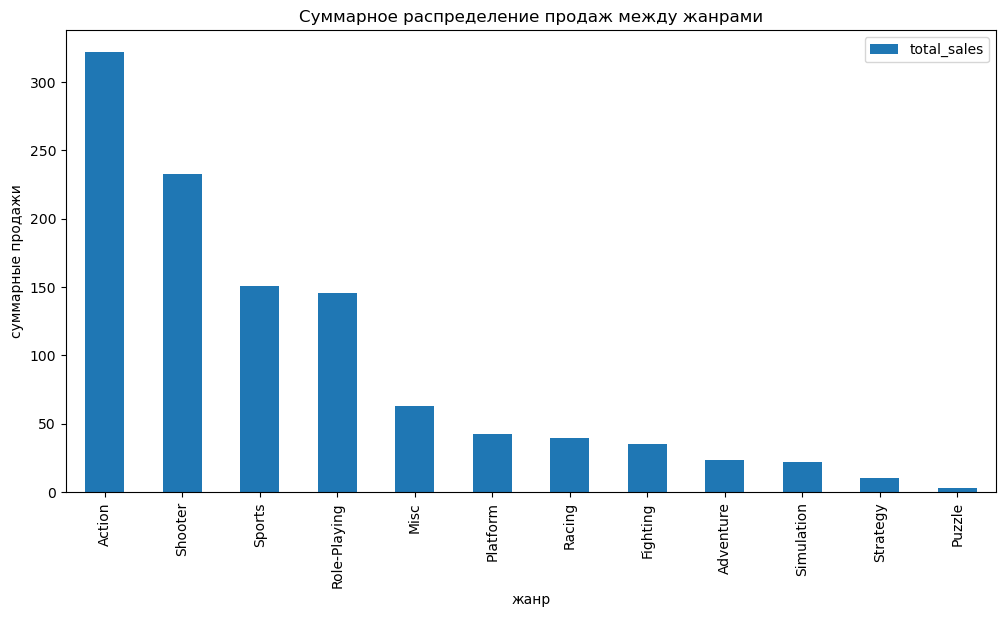

In [57]:
# распределение жанров по сумме общих продаж
(actual_period_data
.pivot_table(index='genre', values='total_sales', aggfunc='sum')
.sort_values(by='total_sales',ascending=False)
.plot(kind='bar', title='Суммарное распределение продаж между жанрами', xlabel='жанр',\
      ylabel='суммарные продажи', figsize=(12,6))
)
plt.show()

Действительно, шутер - самый прибыльный жанр, хотя по популярности находится на пятом месте. Спортивные игры и платформеры занимают второе и третье место по прибыльности. Остальные жанры существенно отстают от тройки лидеров по прибыльности.

По продажам лидирует экшн, а шутер на втором месте, спортивные и ролевые игры делят почетное третье. Остальные жанры существенно отстают по общей сумме продаж. 

По двум графикам можно сделать вывод, что самый "выгодный" жанр для платформы - шутер. Он отлично продается и сам по себе прибыльный. Второе место можно присвоить спортивным играм. Стратегии, пазлы и приключения - самые отстающие по обоим параметрам.

## Особенности региональных рынков

Региональные рынки, несомненно, имеют свои особенности, которые влияют на популярность и продажи игр. Изучим более детально. 
Для начала определим самые популярные платформы для каждого региона.

<a id='13-bullet'></a>

In [58]:
# сведем таблицу, посмотрим на числа
actual_period_data.pivot_table(index='platform', values=['eu_sales', 'na_sales','jp_sales']) 

,eu_sales,jp_sales,na_sales
platform,,,
3DS,0.102178,0.223795,0.126073
DS,0.106250,0.000000,0.071250
PC,0.134180,0.000000,0.058783
PS3,0.196551,0.067681,0.184058
PS4,0.359923,0.040714,0.277398
PSP,0.002537,0.049104,0.000000
PSV,0.017039,0.051927,0.014078
Wii,0.257826,0.002174,0.285217
WiiU,0.172609,0.094609,0.254000


In [59]:
# подготовим данные
region_markets_eu = actual_period_data.pivot_table(index='platform', values='eu_sales')\
.sort_values(by='eu_sales',ascending=False).head(5) 
region_markets_na = actual_period_data.pivot_table(index='platform', values='na_sales')\
.sort_values(by='na_sales',ascending=False).head(5) 
region_markets_jp = actual_period_data.pivot_table(index='platform', values='jp_sales')\
.sort_values(by='jp_sales',ascending=False).head(5) 

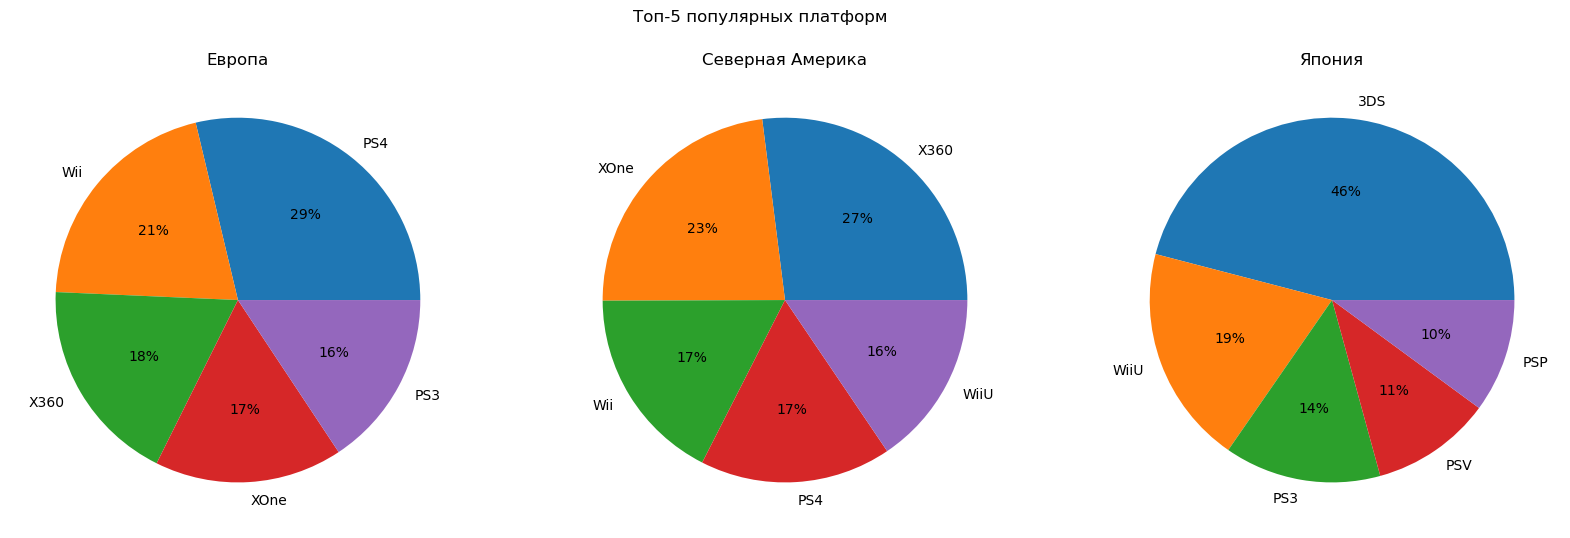

In [60]:
# построим "пирог"
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Топ-5 популярных платформ')
ax1.pie(region_markets_eu['eu_sales'], labels=region_markets_eu.index, normalize=True, autopct='%.0f%%')
ax1.set(title='Европа')
ax2.pie(region_markets_na['na_sales'], labels=region_markets_na.index, normalize=True, autopct='%.0f%%')
ax2.set(title='Северная Америка')
ax3.pie(region_markets_jp['jp_sales'], labels=region_markets_jp.index, normalize=True, autopct='%.0f%%')
ax3.set(title='Япония')
plt.show()

Что и требовалось доказать, у каждого рынка свои любимые платформы. 
Надо помнить, что у PS4 и PS3 один производитель - японская компания Sony. А X360,  XOne - продукты американской компании Microsoft. Производитель Wii и 3DS - японская компания Nintendo. PSV, PSP - портативные консоли Sony.

В Европе лидирует PS4, не намного отстает Wii,  далее X360,  XOne, PS3 по убыванию. X360,  XOne вместе занимают такую же долю, как PS4 и PS3 вместе.

В Северной Америке X360 и с небольшим отставанием XOne. Далее по убыванию Wii, PS4, WiiU. Америка традиционно выбирает американские платформы. 

В Японии подавляющее большинство предпочитает 3DS, далее WiiU, PS3, PSV, PSP. Не удивительно, что PSV, PSP пользуются популярностью. Портативные устройства - отличительная черта азиатского рынка. Также понятно лидирование платформ компании Nintendo - уровень проникновения иностранных платформ на японский рынок традиционно низкий.


Изучим, какие жанры предпочитают игроки разных регионов.

<a id='14-bullet'></a>

In [61]:
# сведем таблицу, посмотрим на числа
actual_period_data.pivot_table(index='genre', values=['eu_sales', 'na_sales','jp_sales']) 

,eu_sales,jp_sales,na_sales
genre,,,
Action,0.154217,0.052859,0.164556
Adventure,0.033673,0.023755,0.029143
Fighting,0.106875,0.095625,0.194375
Misc,0.129290,0.059355,0.177355
Platform,0.210541,0.064730,0.245135
Puzzle,0.058824,0.069412,0.048824
Racing,0.237529,0.027059,0.152471
Role-Playing,0.126610,0.174795,0.158904
Shooter,0.472366,0.035484,0.590000


In [62]:
# подготовим данные
region_genres_eu = actual_period_data.pivot_table(index='genre', values='eu_sales')\
.sort_values(by='eu_sales',ascending=False).head(5)  
region_genres_na = actual_period_data.pivot_table(index='genre', values='na_sales')\
.sort_values(by='na_sales',ascending=False).head(5) 
region_genres_jp = actual_period_data.pivot_table(index='genre', values='jp_sales')\
.sort_values(by='jp_sales',ascending=False).head(5) 

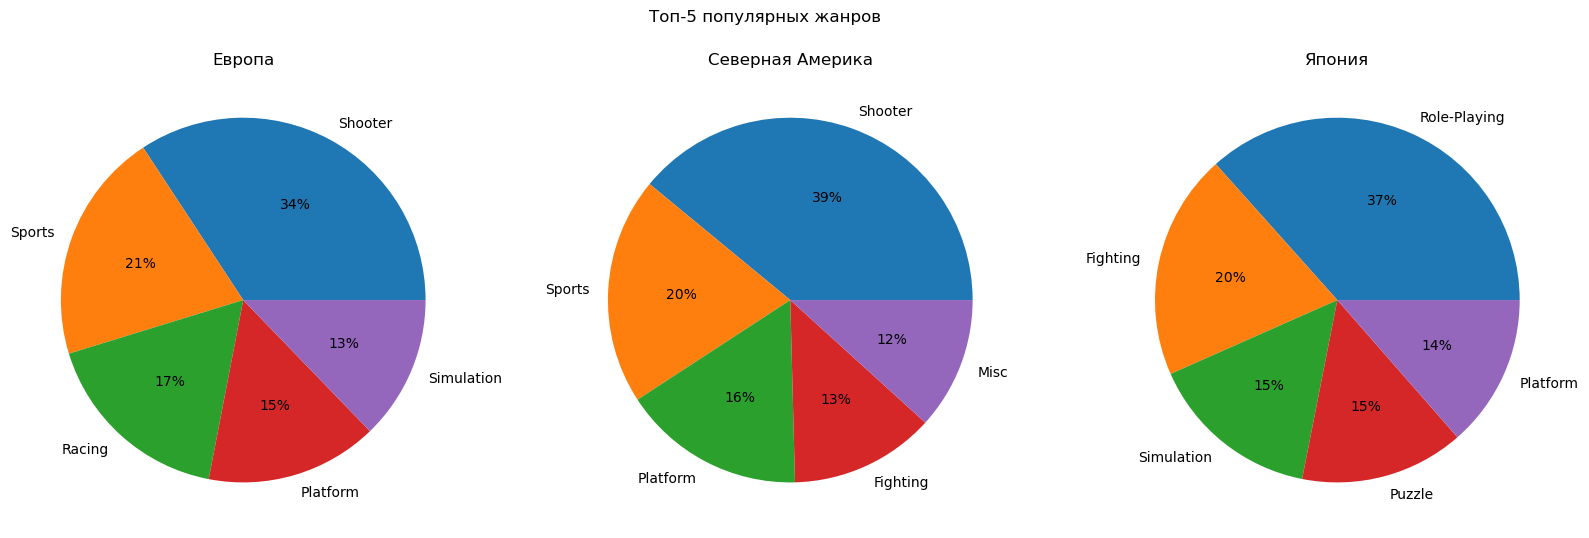

In [63]:
# построим "пирог"
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Топ-5 популярных жанров')
ax1.pie(region_genres_eu['eu_sales'], labels=region_genres_eu.index, normalize=True, autopct='%.0f%%')
ax1.set(title='Европа')
ax2.pie(region_genres_na['na_sales'], labels=region_genres_na.index, normalize=True, autopct='%.0f%%')
ax2.set(title='Северная Америка')
ax3.pie(region_genres_jp['jp_sales'], labels=region_genres_jp.index, normalize=True, autopct='%.0f%%')
ax3.set(title='Япония')
plt.show()

Предпочтения европейцев и американцев схожи. И те и другие больше всего любят шутеры, спортивные игры. Далее европейские игроки примерно одинаково любят гонки, платформеры и симуляторы. Американские пользователи выберут платформеры, файтинги и многопользовательские шутеры. 

Страна восходящего солнца имеет совершенно другой нрав. Наибольшей популярностью пользуются ролевые игры и файтинги. Далее в одинаковой степени популярны симуляторы, платформеры и пазлы.

Рассмотрим распределение продаж по рейтингу ESRB. Для лучшего понимания создадим поясняющую колонку.  

<a id='15-bullet'></a>

In [64]:
# взглянем на содержимое
actual_period_data['rating'].unique()

array(['M', 'Unknown', 'E', 'T', 'E10+'], dtype=object)

In [65]:
# проведем категоризацию
pd.options.mode.chained_assignment = None
def categorize_rating(row):
        if 'M' in row:
            return '«Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.'
        elif 'E' in row:
            return '«Для всех»: Содержание вполне подходит для всех возрастов.'
        elif 'T' in row:
            return '«Подросткам»: Игра подходит для лиц от 13 лет.'
        elif 'E10+' in row:
            return '«Для всех от 10 лет и старше»'
        return 'Рейтинг не определен'
    
actual_period_data['rating_description'] = actual_period_data['rating'].apply(categorize_rating)

In [66]:
# сведем таблицу, посмотрим на числа
actual_period_data.pivot_table(index='rating', values=['eu_sales', 'na_sales','jp_sales']) 

,eu_sales,jp_sales,na_sales
rating,,,
E,0.276026,0.050132,0.261755
E10+,0.169405,0.023373,0.215238
M,0.393821,0.038238,0.447724
T,0.125976,0.061832,0.149520
Unknown,0.080850,0.087131,0.091619


In [67]:
# подготовим данные
region_rating_eu = actual_period_data.pivot_table(index='rating', values='eu_sales')\
.sort_values(by='eu_sales',ascending=False).head(5)  
region_rating_na = actual_period_data.pivot_table(index='rating', values='na_sales')\
.sort_values(by='na_sales',ascending=False).head(5)  
region_rating_jp = actual_period_data.pivot_table(index='rating', values='jp_sales')\
.sort_values(by='jp_sales',ascending=False).head(5)  

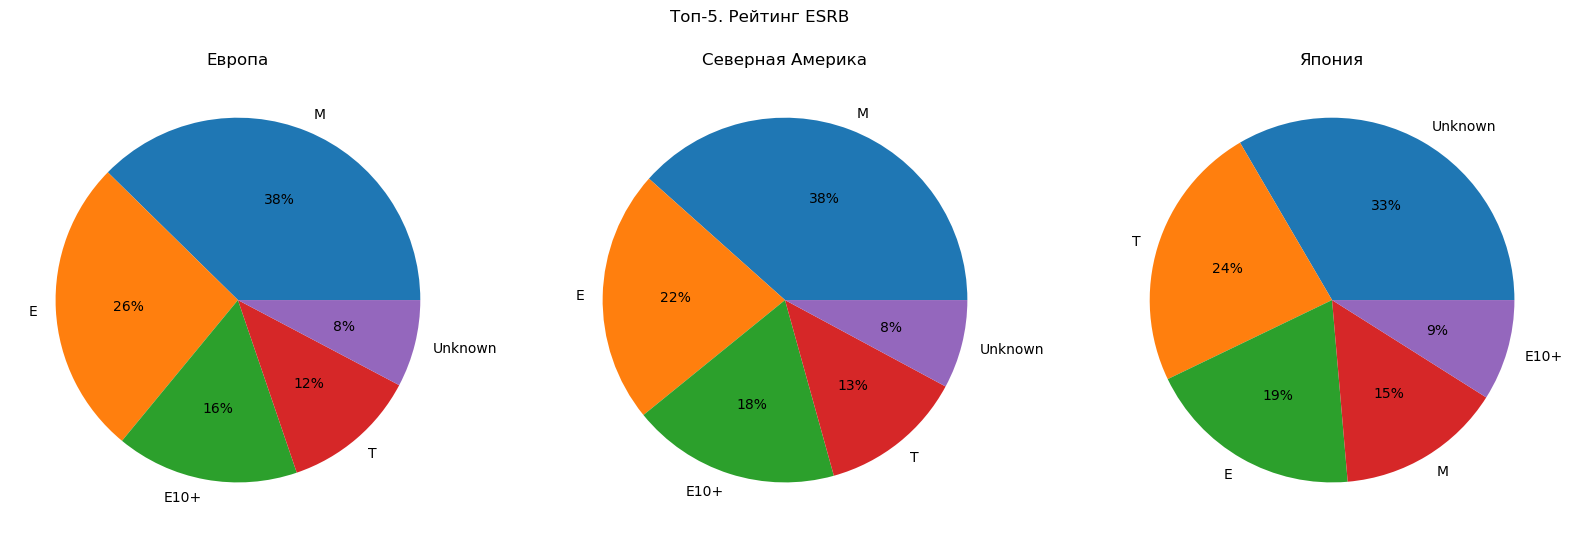

In [68]:
# построим "пирог"
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Топ-5. Рейтинг ESRB')
ax1.pie(region_rating_eu['eu_sales'], labels=region_rating_eu.index, normalize=True, autopct='%.0f%%')
ax1.set(title='Европа')
ax2.pie(region_rating_na['na_sales'], labels=region_rating_na.index, normalize=True, autopct='%.0f%%')
ax2.set(title='Северная Америка')
ax3.pie(region_rating_jp['jp_sales'], labels=region_rating_jp.index, normalize=True, autopct='%.0f%%')
ax3.set(title='Япония')
plt.show()

Снова бросается в глаза сходство вкусов европейцев и американцев. Игры для взрослых имеют наибольшую аудиторию, несколько менее популярны игры для всех возрастных категорий. Далее игры для всех старше 10 лет, игры для подростков и игры с неопределенным рейтингом. 

Большинство японцев играет в игры с неопределенным рейтингом и игры для тинейджеров. После них им интересны игры для всех возрастов, потом игры для взрослых и закрывают список игры для всех старше 10 лет.


Итак, игрок из Европы скорее всего рубится в шутер или спортивную игру, может быть гонки из категории "игры для взрослых" или "игры для всех возрастных категорий" или "игры для всех старше 10 лет" и делает это на платформе PS4, Wii или X360.

Представитель Северной Америки также увлеченно играет в шутер, спортивную игру или платформер из категории "игры для всех возрастных категорий" или "игры для всех старше 10 лет", вероятнее всего на платформе  X360 или XOne, может быть Wii.

В это время японец занят игрой ролевой игрой или файтингом с неопределеным рейтингом или "для подростков" на платформе 3DS или WiiU. Поясним, что в Японии своя рейтинговая модель CERO, поэтому в оценке американской ESRB японцы не нуждаются.

<a id='16-bullet'></a>

## Проверка гипотез

Гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". 

Применим t-test, т.к. это нулевая гипотеза о равенстве и соблюдены условия:
1) генеральные совокупности не зависят друг от друга

2) выборочные средние нормально распределены

3) дисперсии генеральных совокупностей равны

Применим equal_var=False, т.к. дисперсии выборки не можем считать равными.

In [69]:
# удалим пропуски для проверки гипотезы
hypothesis_data = actual_period_data.dropna(subset=['user_score'])
hypothesis_data['user_score'].isna().sum()

0

In [70]:
# сформируем массивы данных и применим тест
XOne_data = hypothesis_data.query('platform == "XOne"')['user_score']
PC_data = hypothesis_data.query('platform == "PC"')['user_score']

alpha = 0.05 

results = st.ttest_ind(XOne_data, PC_data, equal_var=False)

print('p-значение:', results.pvalue.round(4))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.7264
Не получилось отвергнуть нулевую гипотезу


Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не опровергнута.
Проверим еще одну гипотезу.

Сформулируем нулевую гипотезу: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны". 

И альтернативную: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные (т.е. не равны)".

Проверим нулевую гипотезу. Применим ttest, т.к. снова получилась гипотеза о равенстве.

In [71]:
# сформируем массивы данных и применим тест
action_data = hypothesis_data.query('genre == "Action"')['user_score']
sports_data = hypothesis_data.query('genre == "Sports"')['user_score']

alpha = 0.05 

results = st.ttest_ind(action_data, sports_data, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue != alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 3.947118399375673e-10
Отвергаем нулевую гипотезу


Нулевая гипотеза "средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны" отвергается в пользу альтернативной "средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные (т.е. не равны)".

<a id='17-bullet'></a>

## Общий вывод.

Итак, исследование завершено. 

*Подготовлены данные:*

В данных обработаны пропуски, которые могли возникнуть в следствие технических операций с данными (копирование, сохранение, перезаписывание и тд.). Также часть данных до определенного срока не аккуумулировалась.
Например, рейтинг ESRB появился в 1994 году, а в датасете данные с 1980. В Японии собственный рейтинг CERO, поэтому большая доля пропусков в данном регионе. 

Аналогично с пропусками в столбцах с оценками критиков и пользователей. Они появились не сразу. Игровая аналитика начала набирать обороты в 2009 году, т.е. структурирование информации до этого не было повсеместным.

Устранены ошибки, значения, мешающие манипуляциям ("tbd"). 

Добавлен столбец с общими продажами 'total_sales'.

Целью исследования являлось выявление определяющих успешность игры закономерностей, при учете которых магазин сможет закупить потенциально популярный продукт и спланировать рекламные кампании на 2017-й год.

Для этого был *проведен исследовательский анализ и выполнен ряд задач:*

Установлен средний срок жизни платформы. Весь свой жизненный цикл она проходит в среднем за 9-10 лет. Первые 1-2 года "раскачка" (также важно помнить, что в разных регионах старт продаж может происходить с разницей в несколько месяцев). На подъеме платформа находится в среднем 5 лет, далее за 3-4 года продажи сходят на нет.

Для дальнейшего анализа взяты данные за 2013-2016 годы. Это позволило установить, на каком этапе находятся существующие платформы и выявить имеющийся потенциал и лидеров рынка. Также учитываем, что данные за более ранние периоды устарели по той причине, что игровой рынок стремительно развивается и меняется.

Выявлены лидеры рынка, имеющие потенциал: платформа PS4, пришедшая на смену PS3, и Xone, сменившая X360. Однако, в Японии лидирует 3DS.

Определено, что в целом по рынку взаимосвязь между оценками критиков и продажами слабая (0.314), а между оценками игроков и продажами отсутствует (0.093). Корреляция продаж по PS4 приближена к рынку - слабая с оценками критиков (0.407) и отсутствует с оценками пользователей (0.023).
Любопытный факт, что японские платформы WiiU, 3DS демонстрируют примерно одинаковую (0.3) корреляцию между оценками критиков/продажами и оценками пользователей/продажам.

Описаны самые прибыльные и популярные жанры по миру - это шутер и спортивные игры. Однако, в Японии снова всё не так. Их приоритеты - ролевые игры и файтинги.

Разобраны особенности региональных рынков, составлен портрет потребителя для каждого. 

Проверены гипотезы.


**Платформы.**

PS4 выпущена в 2013 на смену PS3 и на данный момент занимает лидирующие позиции в мире по объему продаж. Эксперты ожидают, что PS4 превысит успех PS2, самой успешной в истории платформы. На данный момент платформа на пике, но в 2016 наблюдаем небольшое снижение продаж по сравнению с 2015. Потенциал платформы не исчерпан. Вероятно, в 2017 она сохранит титул самой востребованной платформы. 

XOne также выпущена в 2013 году на смену X360 и уже обогнала предшественницу по объему продаж. На данный момент наблюдается некое снижение, но платформа еще не сдала позиций. Можем ожидать, что в 2017 платформа также останется главным конкурентом PS4. 

3DS выпущена в 2011 году и в актуальном периоде показывает планомерное, постепенное снижение. Сбрасывать со счетов платформу нельзя, т.к. на японском рынке она занимает львиную долю. Однако, роста продаж ожидать не стоит.

WiiU - преемница Wii - выпущена в 2012 году. Wii имеют существенную долю в Северной Америке и Европе, а WiiU в Японии и Северной Америке, но есть четкая тенденция к существенному снижению продаж.

PSV, PSP - портативные устройства, пользуются популярностью на японском рынке. Показывают ощутимое снижение. Стоит ожидать выхода новых портативных устройств на японском рынке. 

**Жанры.**

Самый популярный жанр (наибольшее число релизов) - action - лидирует с большим преимуществом (он же первый по суммарным продажам). За ним следуют ролевые игры, приключения, спортивные игры, шутеры и смешанный жанры.

Однако, самый популярный и самый прибыльный - не одно и тоже. При ближайшем рассмотрении шутер (5 место по популярности) и спортивные игры (4 место по популярности) оказались самыми прибыльными по параметрам медианных и суммарных продаж. Платформеры заняли почетное третье место, т.к. уступают в суммарных продажах.

Стратегии, пазлы и приключения - самые отстающие по обоим параметрам.

**Европа. Особенности рынка.**

PS4 самая популярная платформа в Европе и в 2017 останется лидером. На втором и третьем местах Wii и X360 соответственно. 

Популярность жанров распределяется так: шутеры, спортивные игры, гонки, платформеры, симуляторы.

По рейтингу ESRB так: M, E, E10+, T, неопределенный жанр.

**Северная Америка. Особенности рынка.**

В Северной Америке X360 и с небольшим отставанием XOne лидируют. XOne продолжит бороться за свою долю в 2017. 

Популярность жанров среди американцев: шутеры, спортивные игры, платформеры, файтинги, смешанный жанр.

По рейтингу ESRB: M, E, E10+, T, неопределенный жанр.

**Япония. Особенности рынка.**

3DS с отрывом лидирует в Японии, но необходимо отметить, что равные доли занимают портативные устройства PSV и PSP

Популярность жанров у японцев: ролевые игры, файтинги, симуляции, пазлы, платформеры.

По рейтингу ESRB: неопределенный жанр, T, E, M, E10+

*Поясним, что в Японии своя рейтинговая модель CERO, поэтому в оценке американской ESRB японцы не нуждаются.*

Отдельно отметим, что лидирование платформ компании Nintendo в Японии объяснимо - уровень проникновения иностранных платформ на японский рынок традиционно низкий. Портативные устройства - отличительная черта азиатского рынка, связанная с особенностями потребления. Японцы часто играют в дороге.

В итоге, успешность игры определяет востребованная платформа, популярный в данном регионе и прибыльный жанр, категория рейтинга, распространенная на указанном рынке.

Для европейского и американского рынка в 2017 году предлагаем сделать акцент на платформах PS4 и XOne, на играх в жанрах шутер, спортивные, платформеры из категорий M, E, E10+, T. В Европе также имеет смысл обратить внимание на гонки, симуляторы. В Северной Америке на файтинг, смешанный жанр.

Для японского рынка в 2017 3DS остается основной платформой. Но настоятельно рекомендовано учитывать особенности менталитета и не забывать о портативных устройствах, в семействе которых можно ожидать обновления от Nintendo. В выборе жанров сосредоточиться на ролевых играх и файтингах, также брать в расчет симуляции, пазлы, платформеры из категории неопределенный жанр, T, E, M, E10+. Возможно, для данного региона стоит разобраться в рейтинге CERO для лучшего понимания востребованности определенных категорий игр.

**Рекомендации.**

 - Учитывать особенности региональных рынков. Отталкиваться от предпочтений игроков по платформам, жанрам и рейтингу ESRB. Предпочтения европейцев и американцев схожи. Япония имеет совершенно иную игровую культуру и предпочтения.
 
- Обращать внимание на прибыльность того или иного игрового жанра в конкретном регионе.

- Возможно, стоит уделить больше внимания японскому рынку. Изучить рейтинг CERO и дополнительно ориентироваться на него при подборе игр.

- В 2014 году Китай снял мораторий на продажу игровых консолей зарубежного производства. И на рынок сразу зашла XONe, в 2015 зашли PS4 и PSV. В исследовании нет данных по китайскому рынку, но несомненно, он заслуживает внимания, имея крупнейшую долю игровой индустрии. Рынок обладаетя потенциалом, но и особенностями потребления. Вероятно, стоит изучить данную нишу. 